In [205]:
## Python version is Python 3.10.2

In [206]:
import numpy as np
import matplotlib.pyplot as plt

Here we will use Exponential Moving Average (EMA) for anomaly detection as it can adapt quickly to changing trends, making it suitable for detecting anomalies in dynamic environments (running data streams) with minimal computational overhead compared to more complex machine learning models.

In [207]:
def generate_data_stream(num_points=1000, noise_level=0.2, anomaly_rate=0.05):
    time = np.arange(num_points)
    seasonal_pattern = np.sin(time * 0.05)  # Simulate seasonality in the data
    noise = np.random.normal(0, noise_level, num_points)
    data = seasonal_pattern + noise

    # Inject some anomalies
    anomalies = np.random.choice([0, 1], size=num_points, p=[1 - anomaly_rate, anomaly_rate])
    data[anomalies == 1] += np.random.normal(3, 1, np.sum(anomalies))  # Sudden spikes in the data

    return data

In [208]:
data = generate_data_stream()

In [209]:
## For N data points, the time complexity of this algorithm is O(N) and the space complexity is O(1)

def EMA(data, window_size=50, threshold=3):
    ema = []
    anomalies = []
    moving_avg = np.mean(data[:window_size])

    for i in range(len(data)):
        if i >= window_size:
            moving_avg = (moving_avg * (window_size - 1) + data[i]) / window_size
        ema.append(moving_avg)
        
        # If the deviation is greater than our threshold, then we will mark them as an anomaly
        if abs(data[i] - moving_avg) > threshold * np.std(data[:i+1]):
            anomalies.append(i)
            
    return ema, anomalies

In [210]:
def preprocess(new_data_point):
    try:
        # Converting the new data point to float and validating it
        new_data_point = float(new_data_point)
    except ValueError:
        raise ValueError("Invalid input! Please enter a valid floating-point number.")
    
    return new_data_point

In [211]:
def update(new_data_point, data, max_window_size=1e6):
    # Add new data point to our already created data store
    new_data = np.append(data, new_data_point)
    
    # If the size exceeds the max_size of the data frame (we may ignore it as well), then we will remove the oldest point to maintain a fixed sized window
    if len(data) > max_window_size:
        data.pop(0)
    
    return new_data

In [212]:
def visualize(data, ema, anomalies):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Data Stream')
    plt.plot(ema, label='EMA', linestyle='--')
    plt.scatter(anomalies, data[anomalies], color='red', label='Anomalies')
    plt.legend()
    plt.show()

In [213]:
def process_data(new_data_point, data, ema, anomalies):
    # Appending the new data point to the data store
    data_store = update(new_data_point, data)
    
    # Detecting anomalies on the updated data
    updated_ema, updated_anomalies = EMA(data_store)
    
    # Visualization of the data points and anomalies
    visualize(data_store, updated_ema, updated_anomalies)
    
    return data_store, updated_ema, updated_anomalies

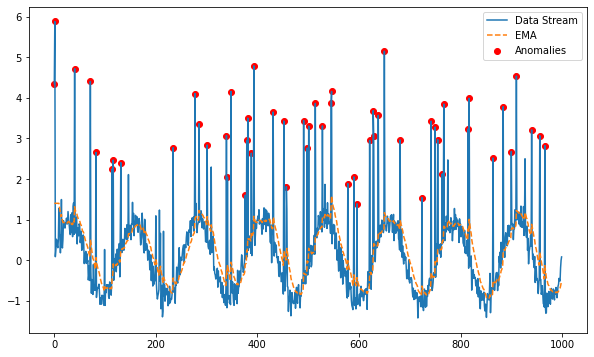

In [214]:
ema, anomalies = EMA(data, 10, 1.5)
visualize(data, ema, anomalies)

In [215]:
## current data shape
cnt = data.shape[0]

97 added to data set....


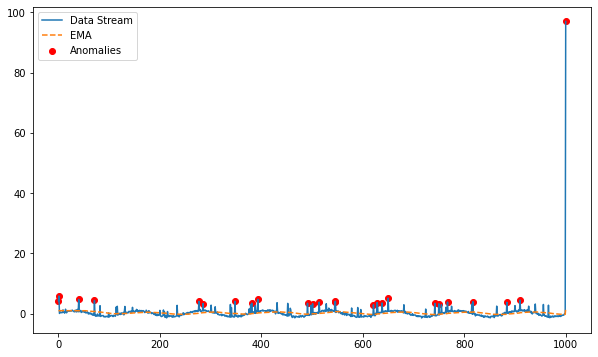

Entered data: 97.0 is an anomaly!
Do you want to add another data point? (y/n)
4 added to data set....


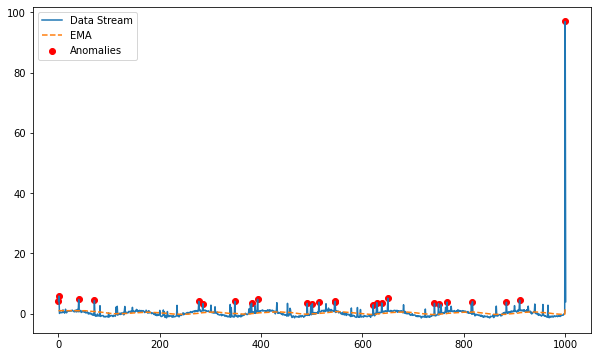

Entered data: 4.0 is not an anomaly.
Do you want to add another data point? (y/n)
1 added to data set....


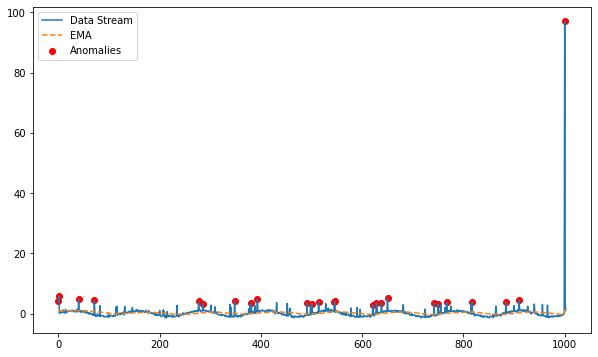

Entered data: 1.0 is not an anomaly.
Do you want to add another data point? (y/n)
5000 added to data set....


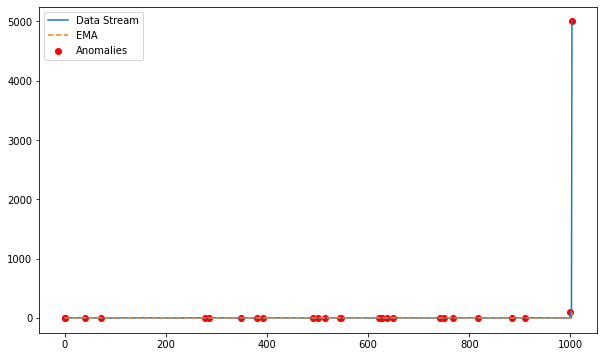

Entered data: 5000.0 is an anomaly!
Do you want to add another data point? (y/n)


In [216]:
while True:
    new_data_point = input("Enter a new data point: ")
    print(new_data_point, "added to data set....")
    new_data_point = preprocess(new_data_point)  # Preprocessing the new data point

    # Processing the registered data and getting the updated EMA and anomalies
    data, ema, anomalies = process_data(new_data_point, data, ema, anomalies)
    
    # Check if the new data point is an anomaly
    if cnt in anomalies:
        print(f"Entered data: {new_data_point} is an anomaly!")
    else:
        print(f"Entered data: {new_data_point} is not an anomaly.")
    
    cnt += 1
    
    print("Do you want to add another data point? (y/n)")
    add_another = input()
    
    while add_another != 'y' and add_another != 'n':
        print("Invalid input. Please enter 'y' or 'n'.")
        add_another = input()
    
    if add_another == 'n':
        break